In [2]:
import numpy as np
from datetime import date
np.random.seed()
import glob
from lat2d import PARSER_MSD, latmc
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

In [6]:
[i for i in range(22,50,1)]

[22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [3]:

N=20
NSTEPS=15000
wp=100
today=date.today()
epsilon = 3
equilibriation=5000
Ns=NSTEPS-equilibriation
WT=wp

        

In [4]:
today=date.today()
import os
coverage=100-np.array([1]+[5*i for i in range(1,6)] + [2*i for i in range(2,22,2) if i%10!=0 ] +[5*i for i in range(6,20,1) ])
#try os.mkdir('Data-2')
for cov in coverage:
    day=today.strftime("%B-%d-%Y")
    fname=f"Coverage-{cov}.txt"
    with open(fname,'w+') as fhand: 
        mylat=latmc.lat_2d(N,cov/100,epsilon,equilibriation)
        mylat.init_lattice()
        mylat.init_energylattice()
        NIONS=len(mylat.ions)
        fhand.write(f"Created:{day} \n")
        fhand.write(f"Coverage:{cov} \n")
        fhand.write(f"N:{N} \n")
        fhand.write(f"NUM-IONS:{NIONS} \n")
        fhand.write(f"NSTEPS:{NSTEPS} \n")
        fhand.write(f"WRITE-PERIODICITY:{wp} \n")
        fhand.write(f"epsilon:{epsilon} \n")
        for i,step in enumerate(range(NSTEPS)):
            mylat.onemcstep()
            if i%WT==0 and i>equilibriation:
                for io in mylat.ions:
                    fhand.write(f"{io.pos[0]}  {io.pos[1]} \n")
        with open('newrr.txt','a+') as fhand:  
            fhand.write(f"Date:{day} ")
            fhand.write(f"Coverage:  {cov} : [ Rejection : {mylat.rejection} Total : {mylat.total} Rejection-Ratio : {mylat.rejection/mylat.total} EnRejection : {mylat.enreject} Rejection-Ratio : {mylat.enreject/mylat.total} ]"+"\n")            

20X20 lattice with coverage 0.99 initialised (396.0 ions
20X20 energy lattice with coverage 0.99 initialised (8.000000000000007) penalties)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3. 0. 

20X20 lattice with coverage 0.96 initialised (384.0 ions
20X20 energy lattice with coverage 0.96 initialised (32.00000000000003) penalties)
[[0. 0. 0. 3. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 3. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

20X20 lattice with coverage 0.68 initialised (272.0 ions
20X20 energy lattice with coverage 0.68 initialised (255.99999999999997) penalties)
[[ 3.  3.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.  3.  0. 12. 12.  0.
   0.  0.]
 [ 0.  0.  9.  0.  0.  3.  0.  6.  0.  0.  0.  0.  3.  0.  0.  3.  0.  3.
   6.  0.]
 [ 0.  0.  0.  3.  0.  3.  6.  0.  0.  0.  3.  0.  6.  0.  3.  3.  0.  0.
   0.  0.]
 [ 3.  0.  6.  0.  0.  0.  3.  0.  6.  3.  3.  3.  0.  3.  0.  6.  3.  0.
   0.  0.]
 [ 0.  0.  3.  0.  0.  0.  0.  3.  3.  0.  3.  0.  3.  3.  0.  6.  0.  9.
   0.  3.]
 [ 9.  0.  0.  3.  3.  0.  0.  3.  6.  3.  0.  6.  0.  3.  0.  3.  0.  3.
   0.  0.]
 [ 0.  0.  0.  3.  0.  3.  6.  3.  0.  0.  6.  0.  3.  0.  0.  0.  0.  3.
   0.  0.]
 [ 3.  3.  3.  0.  3.  3.  3.  3.  0.  0.  0.  0.  6.  3.  9.  3.  3.  0.
   3.  3.]
 [ 3.  3.  0.  0.  3.  3.  0.  0.  0.  3.  3.  0.  0.  0.  0.  0.  3.  0.
   0.  9.]
 [ 3.  9.  0.  6.  0.  3.  3.  0.  6.  0.  6.  0.  0.  0.  6.  3.  3.  0.
   9.  0.]
 [ 6.  0.

20X20 lattice with coverage 0.55 initialised (220.0 ions
20X20 energy lattice with coverage 0.55 initialised (359.99999999999994) penalties)
[[ 0.  3.  3.  0.  0.  6.  9.  3.  3.  0.  6.  3.  3.  3.  0.  0.  3.  0.
   0.  0.]
 [ 3. 12.  0.  3.  9.  9.  0.  0.  3.  0.  0.  0.  3.  3.  3.  9.  0.  9.
   6.  3.]
 [ 6.  3.  0.  0.  3.  3.  3.  3.  0. 12.  0.  0.  3.  0.  3.  0.  3.  0.
   3.  0.]
 [ 6.  0.  0.  6.  3.  6.  0.  3.  3.  0.  3.  3.  3.  0.  3.  0.  0.  9.
   3.  6.]
 [ 0.  0.  0.  3.  3.  6.  3.  3.  6.  9.  0.  0.  0.  0.  0.  3.  3.  9.
   9.  9.]
 [ 0.  3.  0.  3.  0.  3.  0.  3.  6.  0.  0.  3.  3.  0.  6.  3.  6.  3.
   3.  0.]
 [ 0.  6.  6.  0.  6.  0.  0.  0.  3.  0.  3.  3.  3.  3.  3.  0.  9.  0.
   6.  0.]
 [ 0.  6.  3.  0.  6.  0.  3.  0.  6.  0.  0.  6.  6.  3.  0.  3.  9.  0.
   3.  0.]
 [ 3.  3.  3.  0.  9.  0.  0.  3.  6.  3.  6.  0.  0.  9.  0.  0.  3.  0.
   3.  0.]
 [ 0.  3.  3.  3.  3.  0.  9.  0.  3.  9. 12.  3.  0.  3.  0.  0.  0.  0.
   9.  3.]
 [ 0.  3.

20X20 lattice with coverage 0.3 initialised (120.0 ions
20X20 energy lattice with coverage 0.3 initialised (560.0) penalties)
[[ 0.  6.  3.  3.  3.  3.  0.  3.  0.  3. 12.  6.  6.  6.  6.  0.  0.  3.
  12.  3.]
 [ 0.  3.  9.  0.  3.  9.  6.  6.  6.  3.  3.  3.  3.  6.  0.  6.  0. 12.
   6.  6.]
 [ 3.  0.  3.  0.  0.  0.  3.  9.  9.  6.  6. 15.  3.  9.  3.  6.  0.  3.
  12.  0.]
 [ 6.  6.  6. 12.  6.  3.  9.  9.  0.  0.  6.  6.  3.  9.  3.  0.  0.  0.
   6.  6.]
 [ 3.  0.  6.  3.  3.  0.  0.  0.  9.  3.  9.  0.  6.  9.  6.  3.  3.  3.
   3.  6.]
 [ 6.  0.  3.  6.  3.  0. 12.  6. 15.  6.  0.  0.  0.  9.  9.  6.  6.  0.
   9.  6.]
 [ 9.  3.  0.  6.  6.  6.  0. 18.  6.  3.  6. 12.  6.  0.  3.  6.  0.  3.
   6. 12.]
 [ 6.  3.  6.  0.  6.  6.  3.  3.  0.  0.  9.  9.  9.  6.  6.  6.  0.  0.
   3.  0.]
 [ 9.  9.  3.  9.  3.  3.  3.  0.  0.  3.  0.  9.  3.  3.  3.  6.  6. 15.
   6.  3.]
 [15.  0.  6.  3.  6.  3.  3.  0.  3.  0.  6.  0.  0.  0.  0.  0.  9.  9.
   9.  6.]
 [ 0.  0.  6.  9.  6.  3

20X20 lattice with coverage 0.05 initialised (20.0 ions
20X20 energy lattice with coverage 0.05 initialised (760.0) penalties)
[[ 3.  6.  9.  3. 12.  3.  0.  0.  0.  9.  3. 12.  6.  0.  6.  6.  0.  0.
   3. 18.]
 [ 9.  0.  0.  3.  9.  9.  3.  6.  6.  6. 12.  3.  6.  3.  9.  3.  3.  9.
   9.  9.]
 [ 6.  3.  6.  3.  6.  9.  9.  9.  6.  6.  3.  0.  6.  6.  3.  0.  3.  6.
   3.  9.]
 [ 6.  3.  6.  9.  6.  6. 12.  6.  3.  0.  3.  0.  6.  0.  9.  9.  0. 18.
   9.  9.]
 [ 9.  9.  6. 21.  6.  3.  3.  6.  6. 12.  9.  0.  6.  6.  9.  0.  9.  3.
   6.  3.]
 [ 6.  9.  0.  0.  9.  3.  3.  9.  9.  9. 15. 15.  9.  9.  6.  0.  3.  6.
   0.  3.]
 [ 6. 12.  6.  6.  6. 15.  3.  3.  6.  6.  6.  9.  6.  6. 12.  6. 12.  9.
   0.  0.]
 [12. 12.  6.  0.  6. 12. 12.  9.  9.  6.  6.  9.  9.  0.  3.  3.  9. 15.
   9.  3.]
 [ 6.  3.  9.  9.  0.  6.  6. 15.  6.  3. 15.  6.  6.  6.  9.  3.  3. 12.
   0.  6.]
 [ 0.  3.  3.  0.  6.  9. 12.  6.  3.  6.  6. 12.  3.  0.  6.  6.  9.  0.
   6.  6.]
 [ 6.  9.  3.  6.  9.  

In [3]:
"""
import os
rename_list = glob.glob('*.txt')
for i,fname in enumerate(rename_list):
    os.rename(fname,f'data:{i}.txt')
rename_list = glob.glob('*.txt')
rename_list    """

['data:{i}.txt']

In [6]:
MSDS_=dict()
paramlen=7
steps=np.arange(0*100,(Ns//2),wp)

#print(i,'\n',names)
for fname in glob.glob('*.txt'):
    print(fname)
    if fname!='rejection-ratios.txt' and fname!='newrr.txt':
        params=PARSER_MSD.getrunparams(fname,paramlen)
        narray=PARSER_MSD.getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(PARSER_MSD.time_msd(narray,fname,paramlen))

MSDS_

Coverage-10.txt
50
Opened this Coverage-10.txt file:
_______________________
10 
 Coverage-10.txt
Coverage-95.txt
50
Opened this Coverage-95.txt file:
_______________________
95 
 Coverage-95.txt
Coverage-50.txt
50
Opened this Coverage-50.txt file:
_______________________
50 
 Coverage-50.txt
Coverage-96.txt
50
Opened this Coverage-96.txt file:
_______________________
96 
 Coverage-96.txt
Coverage-5.txt
50
Opened this Coverage-5.txt file:
_______________________
5 
 Coverage-5.txt
Coverage-72.txt
50
Opened this Coverage-72.txt file:
_______________________
72 
 Coverage-72.txt
Coverage-84.txt
50
Opened this Coverage-84.txt file:
_______________________
84 
 Coverage-84.txt
Coverage-99.txt
50
Opened this Coverage-99.txt file:
_______________________
99 
 Coverage-99.txt
Coverage-65.txt
50
Opened this Coverage-65.txt file:
_______________________
65 
 Coverage-65.txt
newrr.txt
Coverage-55.txt
50
Opened this Coverage-55.txt file:
_______________________
55 
 Coverage-55.txt
Coverage-80.tx

{10: array([ 2.71096939,  4.49587629,  6.14635417,  7.74052632,  9.35664894,
        11.01774194, 12.55679348, 14.21181319, 15.7675    , 17.27359551,
        18.834375  , 20.32011494, 21.9255814 , 23.49029412, 25.14642857,
        26.66385542, 28.15731707, 29.63549383, 31.064375  , 32.35031646,
        33.59903846, 34.84025974, 36.05822368, 37.29033333, 38.51655405,
        39.7140411 , 41.00208333, 42.36584507, 43.67892857, 44.81521739,
        46.00551471, 47.12089552, 48.03522727, 48.99923077, 49.96367188,
        51.1452381 , 52.20645161, 53.28852459, 54.50916667, 55.66694915,
        56.81336207, 58.01929825, 59.40982143, 60.56636364, 61.62962963,
        62.76933962, 63.96490385, 65.1372549 , 66.412     , 67.54387755]),
 95: array([ 1.28778195,  2.51589799,  3.73941886,  4.94886427,  6.16083427,
         7.37085456,  8.58721396,  9.80587045, 11.02298246, 12.23163808,
        13.43298445, 14.64506957, 15.85804774, 17.08018576, 18.28555764,
        19.48341788, 20.67557766, 21.8648

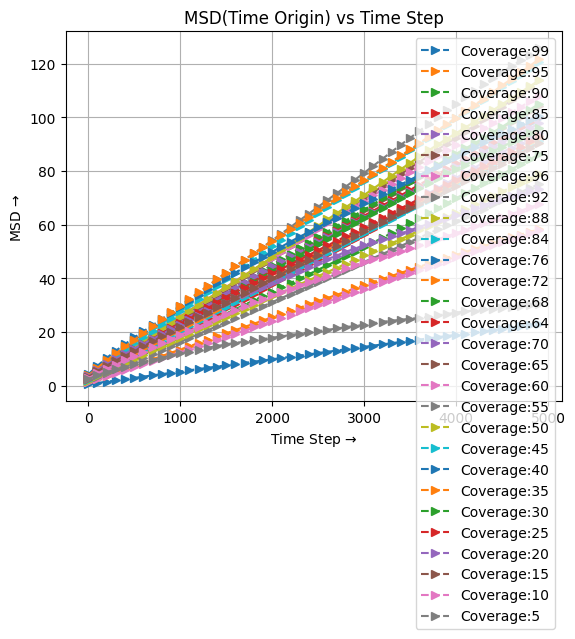

In [7]:

for cov in coverage:
    value=MSDS_[cov]
    plt.plot(steps,value,label=f'Coverage:{cov}'.split()[0],linestyle='--',marker='>')
    
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()

In [8]:
D  = []
x = np.arange(0,(NSTEPS-equilibriation)//2,100)


coverage=100-np.array([1]+[5*i for i in range(1,6)] + [2*i for i in range(2,22,2) if i%10!=0 ] +[5*i for i in range(6,20,1) ])
for cov in sorted(coverage):
    D.append(stats.linregress(x,MSDS_[cov]).slope/4)
    print(cov)
    


5
10
15
20
25
30
35
40
45
50
55
60
64
65
68
70
72
75
76
80
84
85
88
90
92
95
96
99


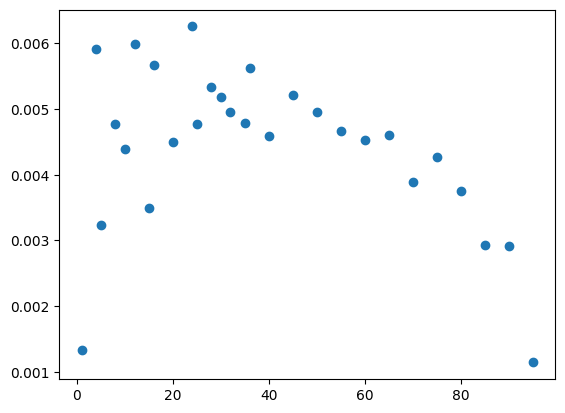

In [9]:

plt.scatter(100-coverage,D)

In [9]:
cov = 98
mylat=latmc.lat_2d(N,cov/100,epsilon)
mylat.init_lattice()
mylat.init_energylattice()

TypeError: __init__() missing 1 required positional argument: 'equilibriation'

In [13]:
Date:December-14-2022 Coverage:  97 : [ Rejection : 3786231 Total : 5820000 Rejection-Ratio : 0.6505551546391752 ]
Date:December-14-2022 Coverage:  95 : [ Rejection : 3664135 Total : 5700000 Rejection-Ratio : 0.642830701754386 ]
Date:December-14-2022 Coverage:  92 : [ Rejection : 3496165 Total : 5520000 Rejection-Ratio : 0.6333632246376811 ]

SyntaxError: invalid syntax (2116308996.py, line 1)

In [10]:
files=glob.glob('Diffusivity-Runs/*.txt')
counter = len(files)

fn = f'Diffusivity-Runs/{counter+1}.txt'
with open(fn,'w+') as file:
    file.write(" Vacancy : Diffusivity  \n")
    for i,cov in enumerate(coverage):
        file.write(f" {100-cov} : {D[i]} ")
        file.write("\n")